In [1]:
# Subword Tokenization with the IMdB Reviews Dataset
# TFDS
# plain_text - is the default 
# subwords8k - a pre-tokenized dataset

import tensorflow_datasets as tfds

# Download the plain text default config
imdb_plaintext, info_plaintext = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

# Download the subword encoded pretokenized dataset
imdb_subwords, info_subwords = tfds.load("imdb_reviews/subwords8k",
                                         with_info=True, as_supervised=True)

In [2]:
# Compare the two datasets
info_plaintext.features

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(), dtype=tf.string),
})

In [3]:
# Take 2 training examples
for example in imdb_plaintext['train'].take(2):
    print(example[0].numpy())

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was

In [4]:
# The subwords8k is already tokenized so the data type will be integers
info_subwords.features

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
})

In [5]:
# Take 2 training examples
for example in imdb_subwords['train'].take(2):
    print(example)

(<tf.Tensor: shape=(163,), dtype=int64, numpy=
array([  62,   18,   41,  604,  927,   65,    3,  644, 7968,   21,   35,
       5096,   36,   11,   43, 2948, 5240,  102,   50,  681, 7862, 1244,
          3, 3266,   29,  122,  640,    2,   26,   14,  279,  438,   35,
         79,  349,  384,   11, 1991,    3,  492,   79,  122,  188,  117,
         33, 4047, 4531,   14,   65, 7968,    8, 1819, 3947,    3,   62,
         27,    9,   41,  577, 5044, 2629, 2552, 7193, 7961, 3642,    3,
         19,  107, 3903,  225,   85,  198,   72,    1, 1512,  738, 2347,
        102, 6245,    8,   85,  308,   79, 6936, 7961,   23, 4981, 8044,
          3, 6429, 7961, 1141, 1335, 1848, 4848,   55, 3601, 4217, 8050,
          2,    5,   59, 3831, 1484, 8040, 7974,  174, 5773,   22, 5240,
        102,   18,  247,   26,    4, 3903, 1612, 3902,  291,   11,    4,
         27,   13,   18, 4092, 4008, 7961,    6,  119,  213, 2774,    3,
         12,  258, 2306,   13,   91,   29,  171,   52,  229,    2, 1245,
    

In [6]:
# Get the encoder object included in the download and use it to decode the sequence above
# This will result in the same sentences provided in the plain_text

# Get the encoder
tokenizer_subwords = info_subwords.features['text'].encoder

# Take 2 training examples and decode the text feature
for example in imdb_subwords['train'].take(2):
    print(tokenizer_subwords.decode(example[0]))

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was cons

In [7]:
# Subword Text Encoding

# Get the train set
train_data = imdb_plaintext['train']

# Init sentences list
training_sentences = []

# Loop over all training examples and save
for s,_ in train_data:
    training_sentences.append(s.numpy().decode('utf-8'))

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
oov_tok = "<OOV>"

# Init Tokenizer class
tokenizer_plaintext = Tokenizer(num_words = 10000, oov_token=oov_tok)

# Generate the word index dict fot the training sentences
tokenizer_plaintext.fit_on_texts(training_sentences)

# Generate the training sequences
sequences = tokenizer_plaintext.texts_to_sequences(training_sentences)

In [9]:
# Decode the first sequence using Tokenizer class
tokenizer_plaintext.sequences_to_texts(sequences[0:1])

["this was an absolutely terrible movie don't be <OOV> in by christopher walken or michael <OOV> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <OOV> rebels were making their cases for <OOV> maria <OOV> <OOV> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining actor's like christopher <OOV> good name i could barely sit through it"]

In [10]:
# Total number of words in the word index dictionary
len(tokenizer_plaintext.word_index)

88583

In [11]:
# Encode the first plaintext sentence using the subowrd text encoder
tokenized_string = tokenizer_subwords.encode(training_sentences[0])
print(tokenized_string)

# Decode the sequence
original_string = tokenizer_subwords.decode(tokenized_string)
print(original_string)

[62, 18, 41, 604, 927, 65, 3, 644, 7968, 21, 35, 5096, 36, 11, 43, 2948, 5240, 102, 50, 681, 7862, 1244, 3, 3266, 29, 122, 640, 2, 26, 14, 279, 438, 35, 79, 349, 384, 11, 1991, 3, 492, 79, 122, 188, 117, 33, 4047, 4531, 14, 65, 7968, 8, 1819, 3947, 3, 62, 27, 9, 41, 577, 5044, 2629, 2552, 7193, 7961, 3642, 3, 19, 107, 3903, 225, 85, 198, 72, 1, 1512, 738, 2347, 102, 6245, 8, 85, 308, 79, 6936, 7961, 23, 4981, 8044, 3, 6429, 7961, 1141, 1335, 1848, 4848, 55, 3601, 4217, 8050, 2, 5, 59, 3831, 1484, 8040, 7974, 174, 5773, 22, 5240, 102, 18, 247, 26, 4, 3903, 1612, 3902, 291, 11, 4, 27, 13, 18, 4092, 4008, 7961, 6, 119, 213, 2774, 3, 12, 258, 2306, 13, 91, 29, 171, 52, 229, 2, 1245, 5790, 995, 7968, 8, 52, 2948, 5240, 8039, 7968, 8, 74, 1249, 3, 12, 117, 2438, 1369, 192, 39, 7975]
This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not re

In [12]:
# Subword encoding can even perform well on words that are not commonly found on movie reviews

In [13]:
# Sample sentence
sample_string = "TensorFlow, from basics to mastery"

# Encode using the plain text tokenizer
tokenized_string = tokenizer_plaintext.texts_to_sequences([sample_string])
print("Tokenized string is {}".format(tokenized_string))

# Decode 
original_string = tokenizer_plaintext.sequences_to_texts(tokenized_string)
print("The original string: {}".format(original_string))

Tokenized string is [[1, 37, 1, 6, 1]]
The original string: ['<OOV> from <OOV> to <OOV>']


In [14]:
# Compare to the subword text encoder
tokenized_string = tokenizer_subwords.encode(sample_string)
print("Tokenized string is {}".format(tokenized_string))

# Decode
original_string = tokenizer_subwords.decode(tokenized_string)
print("The original string: {}".format(original_string))

Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
The original string: TensorFlow, from basics to mastery


In [15]:
# The downside is that the token sequence is much longer. Instead of 5 are 11 tokens

In [16]:
# Token subword mapping
for ts in tokenized_string:
    print("{}---->{}".format(ts, tokenizer_subwords.decode([ts])))

6307---->Ten
2327---->sor
4043---->Fl
2120---->ow
2---->, 
48---->from 
4249---->basi
4429---->cs 
7---->to 
2652---->master
8050---->y


In [17]:
# Training the model using pre-tokenized dataset
# Since, these are already saved as sequences, the next step is to make uniform sized arrays for
# the train and test sets
# These are also tf.data.Dataset type so padded_batch() can be use

BUFFER_SIZE = 10000
BATCH_SIZE = 64

# Get the train and test splits
train_data, test_data = imdb_subwords['train'], imdb_subwords['test'],

# Shuffle the training data
train_dataset = train_data.shuffle(BUFFER_SIZE)

# Batch and pad the datasets to the maximum length of the sequences
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

In [18]:
# Build the Model

import tensorflow as tf

# Define embedding dimensionality
embedding_dim = 64

# Build model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer_subwords.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [19]:
num_epochs = 10

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset, verbose=2)

Epoch 1/10
391/391 - 20s - loss: 0.6845 - accuracy: 0.5863 - val_loss: 0.6511 - val_accuracy: 0.7454
Epoch 2/10
391/391 - 19s - loss: 0.5503 - accuracy: 0.7811 - val_loss: 0.4723 - val_accuracy: 0.8175
Epoch 3/10
391/391 - 17s - loss: 0.3947 - accuracy: 0.8614 - val_loss: 0.3801 - val_accuracy: 0.8584
Epoch 4/10
391/391 - 16s - loss: 0.3168 - accuracy: 0.8886 - val_loss: 0.3404 - val_accuracy: 0.8690
Epoch 5/10
391/391 - 17s - loss: 0.2762 - accuracy: 0.9024 - val_loss: 0.3212 - val_accuracy: 0.8762
Epoch 6/10
391/391 - 17s - loss: 0.2480 - accuracy: 0.9121 - val_loss: 0.3130 - val_accuracy: 0.8773
Epoch 7/10
391/391 - 17s - loss: 0.2281 - accuracy: 0.9192 - val_loss: 0.3126 - val_accuracy: 0.8765
Epoch 8/10
391/391 - 16s - loss: 0.2090 - accuracy: 0.9252 - val_loss: 0.3105 - val_accuracy: 0.8795
Epoch 9/10
391/391 - 17s - loss: 0.1970 - accuracy: 0.9296 - val_loss: 0.3139 - val_accuracy: 0.8794
Epoch 10/10
391/391 - 17s - loss: 0.1847 - accuracy: 0.9345 - val_loss: 0.3148 - val_accura

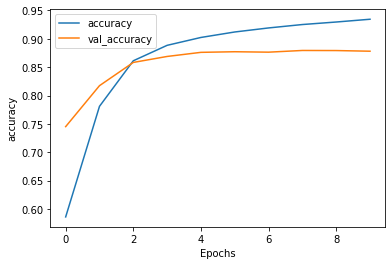

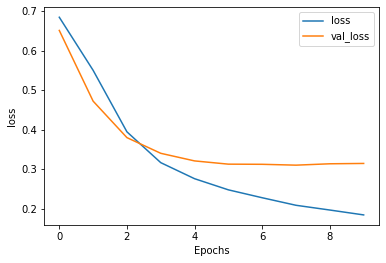

In [22]:
# Visualize

import matplotlib.pyplot as plt
%matplotlib inline

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")